- 📚 데이터 사이언티스트의 실전노트, 이지영, [비제이퍼블릭](https://bjpublic.tistory.com/) 
- 🌟 [YouTube: 통계학 & 데이터과학](https://https://www.youtube.com/channel/UC2BreMMPUd0djRpA4UEaD3Q)
- 💻 [클래스101: 데이터 과학자 실무 프로젝트 (분석+예측모델 + AWS 자동화)](https://class101.page.link/MhG4)


## 3.2 기본 통계로 질문자 되기
### 3.2.19 차원의 저주란 무엇일까? (Page 311)

In [5]:
import random
import pandas as pd
import numpy as np


# 그래프 관련 라이브러리 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

# matplotlib 폰트 설정 (Mac OS인 경우) 및 유니코드 에러 고치기 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False 

plt.rc('font', size=14) # 글씨 크기 설정
plt.rc('figure', figsize=[16,8]) # 그래프 크기설정

x 값: [7, 35, 12, 53, 99, 14, 5, 49, 69, 72, 43, 44, 100, 21, 18, 89, 91, 90, 32, 87, 1, 56, 98, 77, 93, 9, 80, 41, 58, 95, 6, 78, 19, 17, 3, 38, 79, 37, 31, 67, 62, 54, 66, 50, 20, 22, 34, 52, 60, 71]

y 값: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


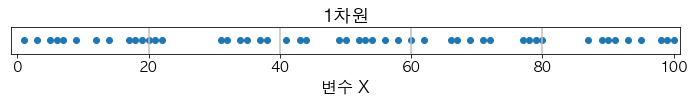

In [6]:
# 1차원 
random.seed(123)
x = random.sample(range(1, 101), 50) # 1부터 100까지 50개 임의적으로 추출 
y = [0 for val in x] # 1차원이므로 y값은 동일하게 0으로 맞춤
print(f'x 값: {x}\n')
print(f'y 값: {y}')

# 산점도 
fig, ax = plt.subplots() 
fig.set_size_inches(12, 0.5)
plt.scatter(x, y) # x와 y의 산점도(scatter plot)

for grid_pt in [20, 40, 60, 80]: # 구분선(grid) 추가
    plt.axvline(x=grid_pt, color='silver')
    
ax.set_xlim((-1,101)) # x축 값 -1부터 101
ax.set_xlabel("변수 X", fontsize=16)

plt.yticks([], []) # y값 지워줌

plt.title("1차원", fontsize=18)
plt.show()


x 값: [7, 35, 12, 53, 99, 14, 5, 49, 69, 72, 43, 44, 100, 21, 18, 89, 91, 90, 32, 87, 1, 56, 98, 77, 93, 9, 80, 41, 58, 95, 6, 78, 19, 17, 3, 38, 79, 37, 31, 67, 62, 54, 66, 50, 20, 22, 34, 52, 60, 71]

y 값: [78, 82, 68, 73, 41, 2, 51, 83, 66, 56, 88, 69, 99, 86, 77, 63, 67, 54, 48, 92, 5, 24, 11, 85, 34, 22, 43, 44, 71, 94, 10, 59, 50, 97, 3, 25, 12, 93, 96, 79, 1, 58, 23, 15, 26, 35, 33, 47, 4, 62]


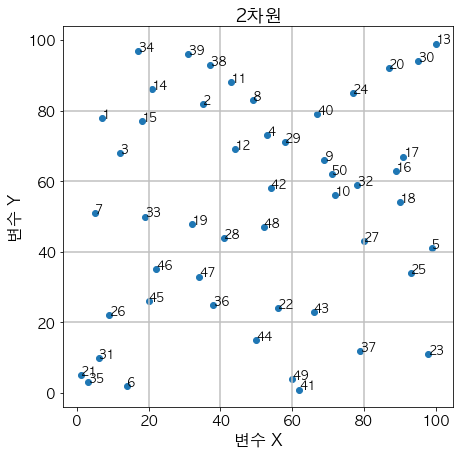

In [7]:
# 2차원: x, y값 필요
random.seed(123)
x = random.sample(range(1, 101), 50) 
y = random.sample(range(1, 101), 50) 
print(f'x 값: {x}\n')
print(f'y 값: {y}')

# 산점도 그리기 
fig, ax = plt.subplots()
fig.set_size_inches(7, 7) # 그래프 사이즈 설정 

plt.scatter(x, y) # x, y 산점도 

n = list(range(1,51)) # x, y 산점도에 번호 매기기 
for i, txt in enumerate(n): # 각 찍힌 점마다 순서가 몇 번인지 표시 
    ax.annotate(txt, (x[i], y[i]), fontsize=12)

for grid_pt in [20, 40, 60, 80]: # 각 축마다 구분선(grid) 추가
    plt.axvline(x=grid_pt, color='silver')
    plt.axhline(y=grid_pt, color='silver')

ax.set_xlabel("변수 X", fontsize=16)
ax.set_ylabel("변수 Y", fontsize=16)
plt.title("2차원", fontsize=18)
plt.show()


x 값: [7, 35, 12, 53, 99, 14, 5, 49, 69, 72, 43, 44, 100, 21, 18, 89, 91, 90, 32, 87, 1, 56, 98, 77, 93, 9, 80, 41, 58, 95, 6, 78, 19, 17, 3, 38, 79, 37, 31, 67, 62, 54, 66, 50, 20, 22, 34, 52, 60, 71]

y 값: [78, 82, 68, 73, 41, 2, 51, 83, 66, 56, 88, 69, 99, 86, 77, 63, 67, 54, 48, 92, 5, 24, 11, 85, 34, 22, 43, 44, 71, 94, 10, 59, 50, 97, 3, 25, 12, 93, 96, 79, 1, 58, 23, 15, 26, 35, 33, 47, 4, 62]

z 값: [36, 63, 97, 80, 92, 29, 69, 61, 22, 19, 68, 56, 48, 59, 5, 1, 17, 58, 24, 2, 32, 45, 34, 55, 53, 0, 13, 8, 65, 79, 11, 10, 77, 85, 88, 9, 51, 3, 20, 16, 30, 81, 66, 35, 21, 26, 96, 67, 40, 52]


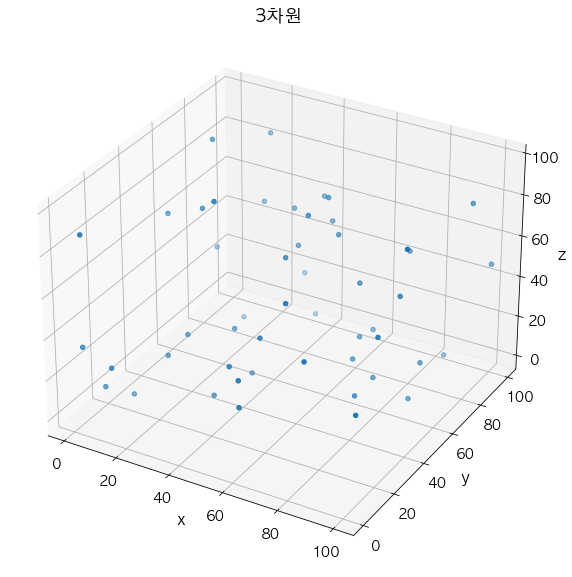

In [8]:
# 3차원: x, y, z 필요 
random.seed(123)
x = random.sample(range(1, 101), 50) 
y = random.sample(range(1, 101), 50) 
z = random.sample(range(0, 101), 50)

print(f'x 값: {x}\n')
print(f'y 값: {y}\n')
print(f'z 값: {z}')

# 3차원에 필요한 라이브러리  
from mpl_toolkits import mplot3d

fig = plt.figure() 
ax  = fig.add_subplot(1,1,1, projection='3d') # 축 X, Y, Z 설정

fig.set_size_inches(10, 10)
ax.scatter(x, y, z) # 산점도 (구분선은 자동으로 추가)

ax.set_xlabel("x", fontsize=16)
ax.set_ylabel("y", fontsize=16)
ax.set_zlabel("z", fontsize=16)

plt.title("3차원", fontsize=18)
plt.show()


⚠ 저작권: Copyright 2022. (이지영) all rights reserved. 본 자료는 저작권법에 의하여 보호받는 저작물로서 이에 대한 무단 복제 및 배포를 원칙적으로 금합니다. 협의 없이 배포하거나 무단으로 사용할 경우 저작권법 제136조, 137조, 138조 위반으로 사전 경고 없이 손해배상 청구 등 민,형사상의 책임과 처벌을 받을 수 있습니다.